In [2]:
import warnings
warnings.filterwarnings("ignore")
import pyart
from collections import Counter
# import pydda
import wradlib as wrl
# import xarray as xr
# import pandas as pd
import datetime as dt
import numpy as np
import pathlib
import scipy
# import wradlib as wrl
# import netCDF4 as nc
from matplotlib import pyplot as plt
from matplotlib.ticker import NullFormatter, FuncFormatter
from matplotlib import axes
import cartopy.crs as ccrs
import cartopy.feature as feat
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import glob, os, sys, re
%matplotlib inline


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



<frozen importlib._bootstrap>:283: DeprecationWarning: the load_module() method is deprecated and slated for removal in Python 3.12; use exec_module() instead


In [3]:
basedir = "/depot/dawson29/data/Projects/PERiLS/obsdata/2022/Illinois_Mobile_Radar/IOP1/COW1/merged"

In [4]:
files = glob.glob(os.path.join(basedir, "*.nc"))
files.sort()
len(files)

181

In [5]:
radar = pyart.io.read_cfradial(files[111])

In [6]:
radar.fields.keys()

dict_keys(['NCP', 'TRIP_FLA', 'SNRHC', 'SNRVC', 'DBMHC', 'DBMVC', 'DBZHC', 'DBZHC_F', 'DBZVC', 'DBZVC_F', 'VEL', 'VEL_F', 'VS', 'VS_F', 'VL', 'VL_F', 'WIDTH', 'ZDRM', 'RHOHV', 'PHIDP', 'KDP', 'DBZHCC', 'DBZHCC_F', 'ZDRC'])

In [7]:
import cartopy.crs as ccrs
import cartopy.feature as feat
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from metpy.plots import USCOUNTIES

In [43]:
import cartopy.crs as ccrs
import cartopy.feature as feat
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from metpy.plots import USCOUNTIES

def map_features(ax, b=False, l=False, t=False, r=False, coastline=False, 
                     borders=False, ocean=False, states=True, counties=False, 
                     land=False, grids=False):
    '''Add cartopy features to the axis'''
    gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.3, color='black', 
                      alpha=0.3, linestyle='-', draw_labels=True)
    gl.xlabels_top = t
    gl.xlabels_bottom = b
    gl.ylabels_left = l
    gl.ylabels_right = r
    if grids:
        gl.xlines = True
        gl.ylines = True
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    if borders:
        ax.add_feature(feat.BORDERS, lw = 0.5)
    if land:
        ax.add_feature(feat.LAND, lw = 0.3, fc = [0.9,0.9,0.9])
    if coastline:
        ax.add_feature(feat.COASTLINE, lw = 0.5)
    if ocean:
        ax.add_feature(feat.OCEAN, alpha = 0.5)
    if states:
        ax.add_feature(feat.STATES.with_scale("10m"), alpha = 0.5, lw = 0.5)
    if counties:
        ax.add_feature(USCOUNTIES.with_scale('500k'), alpha=0.3, linestyle=':', lw = 0.3)

(-457768.0725434128,
 457768.07254341396,
 -1095585.4009079486,
 12120.679417021998)

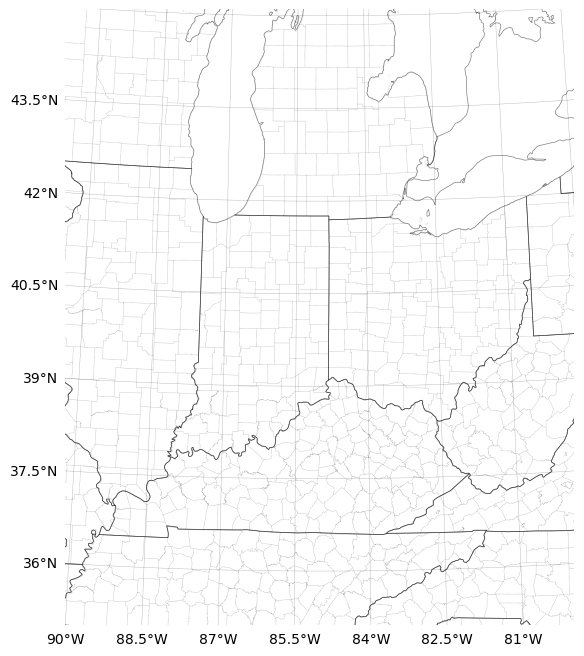

In [47]:
fig = plt.figure(figsize=[10, 8])
ax = plt.axes(projection = ccrs.LambertAzimuthalEqualArea(central_longitude=-85.0, central_latitude=45.0))
ax.set_extent([-90, -80, 35, 45], ccrs.Geodetic())
map_features(ax=ax, b=1, l=1, states=True, counties=True)
ax.axis("off")

In [51]:
import urllib.request
url = "https://raw.githubusercontent.com/syedhamidali/test_scripts/master/map_features.py"
urllib.request.urlretrieve(url, "map_features.py")
import map_features as mf

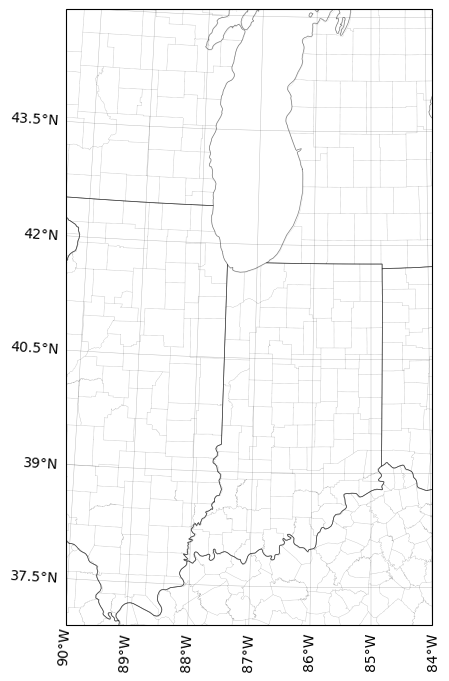

In [56]:
fig = plt.figure(figsize=[10, 8])
ax = plt.axes(projection = ccrs.AzimuthalEquidistant(central_longitude=-85.0, central_latitude=45.0))
ax.set_extent([-90, -84, 37, 45], ccrs.Geodetic())
mf.map_features(ax=ax, b=1, l=1, states=True, counties=True)
# ax.axis("off")